# Rainfall Weather Forecasting Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/tabrezkhan/Downloads/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

As we can see thatour dataset contains many null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

there are 7 columns with categorical data and remaining are numeric columns

In [7]:
#Estimating the null values in percentage in the database
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Sunshine         47.406528
Evaporation      41.685460
Cloud3pm         29.139466
Cloud9am         28.735905
Pressure3pm      15.572700
Pressure9am      15.537092
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
RainToday         2.848665
Rainfall          2.848665
RainTomorrow      2.836795
WindSpeed3pm      1.270030
Humidity3pm       1.210682
Temp3pm           1.139466
WindSpeed9am      0.902077
MinTemp           0.890208
MaxTemp           0.712166
Humidity9am       0.700297
Temp9am           0.664688
Location          0.000000
Date              0.000000
dtype: float64

1. Column like Evaporation, Sunshine, Cloud9am, Cloud3pm are having missing values greater than the 25% may contain the important information and should be filled with appropriate statistic
2. for remaining values we can impute the data by mean or mode according to the dataset

In [11]:
# Checking number of unique values in each column
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


1. Rainfall is highly positively skewed as the mean is very high as compared to median
2. Evaporation is also right skewed, as mean is greater than median
3. windspeed9am and windgustspeed are positively skewed, but to be treated for removal of skewness
4. Sunshine is negatively skewed but is in acceptable range
5. other columns are near normal or in acceptable range

changing date column in to year, month and day

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Converting date to Datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Separating date feature to 3 attributes
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
#Checking the skewness of the database
df.skew().sort_values(ascending=False)

Rainfall         13.028837
Evaporation      10.710605
WindSpeed9am      0.956250
WindGustSpeed     0.711103
WindSpeed3pm      0.491069
Year              0.418663
Temp3pm           0.395061
MaxTemp           0.379297
Humidity3pm       0.117563
Month             0.039388
Day               0.004260
Pressure3pm      -0.009385
Temp9am          -0.014699
Pressure9am      -0.022133
MinTemp          -0.089588
Cloud3pm         -0.232598
Humidity9am      -0.255843
Cloud9am         -0.309417
Sunshine         -0.519717
dtype: float64

We have found out the result of skew as predicted by the describe and have to be treated while preprocessing

No     73.531157
Yes    23.632047
Name: RainTomorrow, dtype: float64

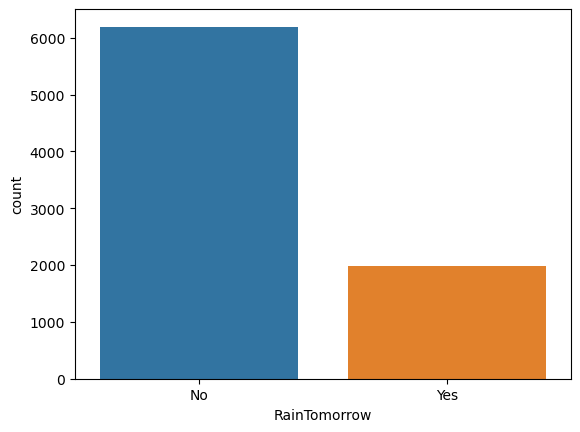

In [18]:
# Count Plot for the Rain tomorrow
sns.countplot(x=df['RainTomorrow'])
df['RainTomorrow'].value_counts()/8425*100

As we can see only for 24% times rain came on the next day and for 78% it was not seen

No     73.531157
Yes    23.620178
Name: RainToday, dtype: float64

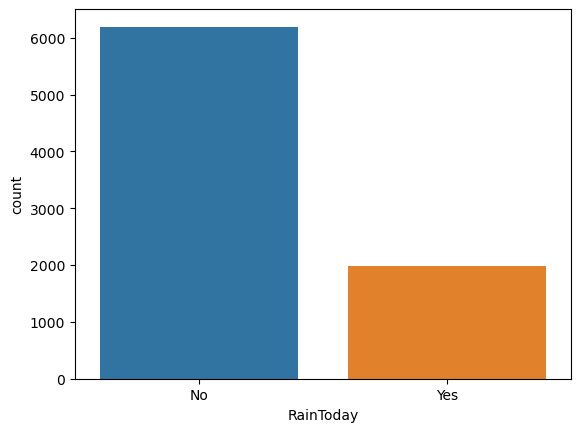

In [19]:
# Count Plot for the Rain today
sns.countplot(x=df['RainToday'])
df['RainToday'].value_counts()/8425*100

It is seen that the rain is following the same pattern

Melbourne       19.252226
Williamtown     14.599407
PerthAirport    14.290801
Albury          10.765579
Newcastle        9.756677
CoffsHarbour     7.252226
Brisbane         6.872404
Penrith          5.721068
Wollongong       5.626113
Darwin           2.967359
Adelaide         2.433234
Uluru            0.462908
Name: Location, dtype: float64

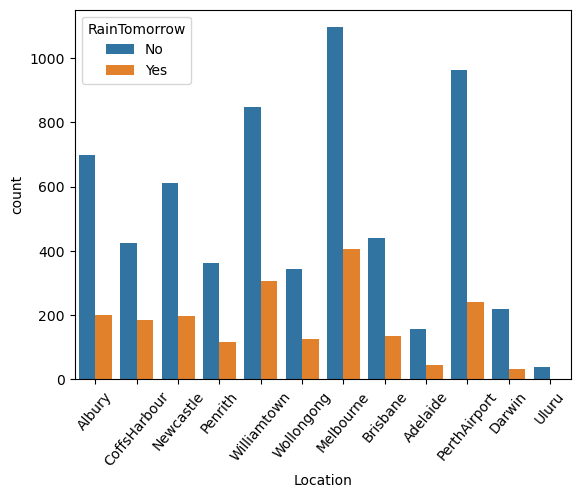

In [20]:
# Count Plot for location
sns.countplot(x=df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=50)
df['Location'].value_counts()/8425*100

In Melbourne we can see that rain happened for more occurance

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

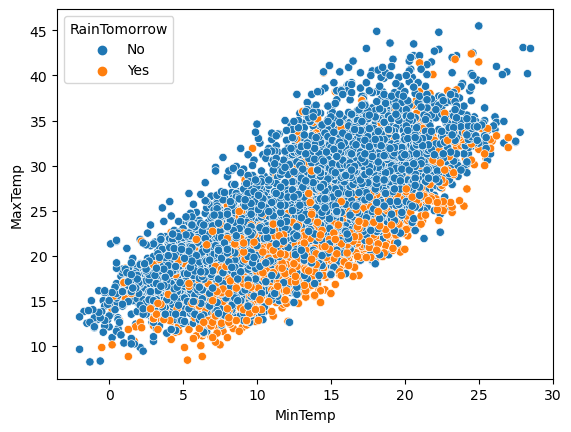

In [21]:
# Plotting scatterplot between minTemp and MaxTemp and raintomorrow
sns.scatterplot(data=df,x='MinTemp',y='MaxTemp',hue='RainTomorrow')

As temperature increases the possibility of raining decreases

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

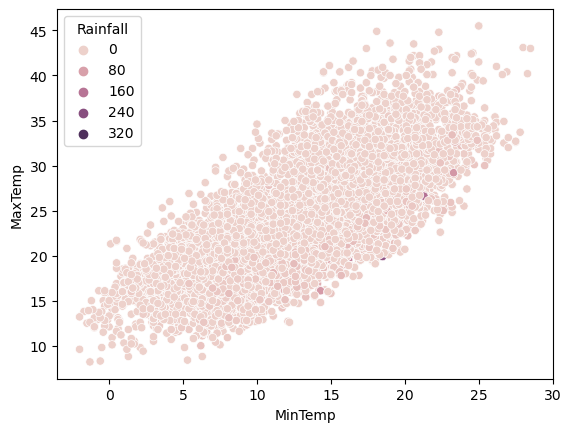

In [22]:
# Plotting scatterplot between minTemp and MaxTemp and rainfall 
sns.scatterplot(data=df,x='MinTemp',y='MaxTemp',hue='Rainfall')

The amount of the rainfall is at min temp greater than 15 and max temp is less than 30

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

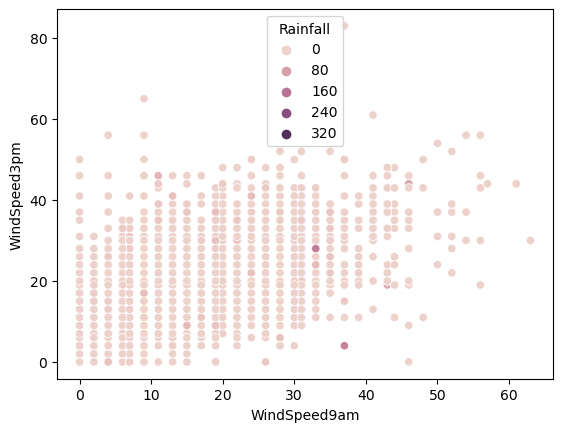

In [23]:
# Plotting scatterplot between windspeed9am and windspeed3pm and rainfall 
sns.scatterplot(data=df,x='WindSpeed9am',y='WindSpeed3pm',hue='Rainfall')

As we can see that the rainfall is almost same for windspeed range, except some values

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

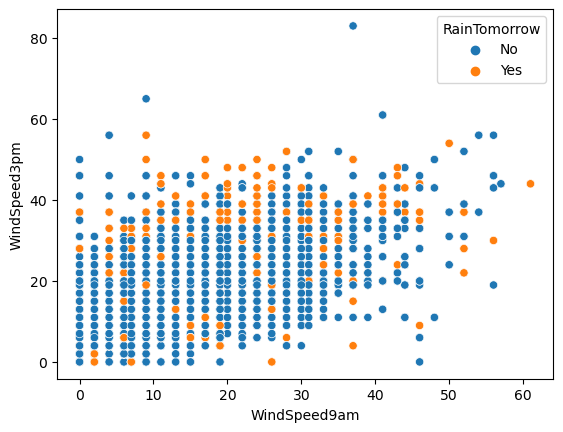

In [24]:
# Plotting scatterplot between windspeed9am and windspeed3pm and RainTomorrow 
sns.scatterplot(data=df,x='WindSpeed9am',y='WindSpeed3pm',hue='RainTomorrow')

When windspeed at 3pm is higher it has showed rain tomorrow

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

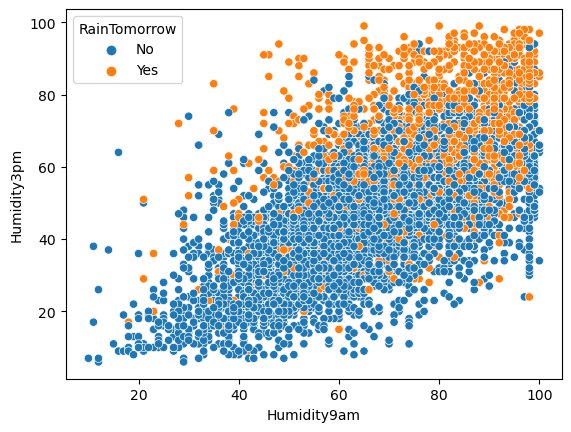

In [25]:
# Plotting scatterplot between Humidity and RainTomorrow 
sns.scatterplot(data=df,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow')

It is seen that when humidity becomes high the possibility of raining is higher

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

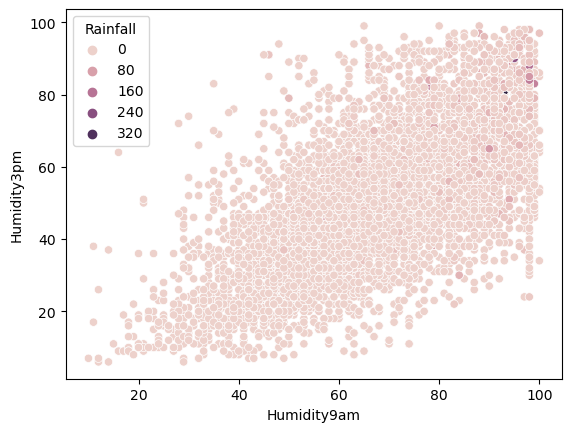

In [27]:
# Plotting scatterplot between humidity and Rainfall
sns.scatterplot(data=df,x='Humidity9am',y='Humidity3pm',hue='Rainfall')

Higher Humidity has resulted high amount of rainfall too in some cases

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

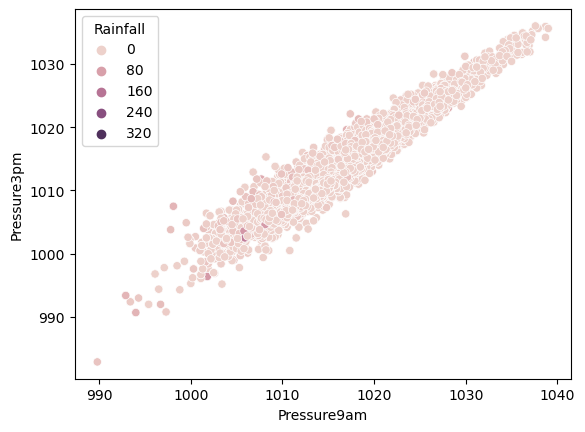

In [28]:
# Plotting scatterplot between pressure and Rainfall
sns.scatterplot(data=df,x='Pressure9am',y='Pressure3pm',hue='Rainfall')

As we can see that when pressure is lower side the amount of rainfall is higher

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

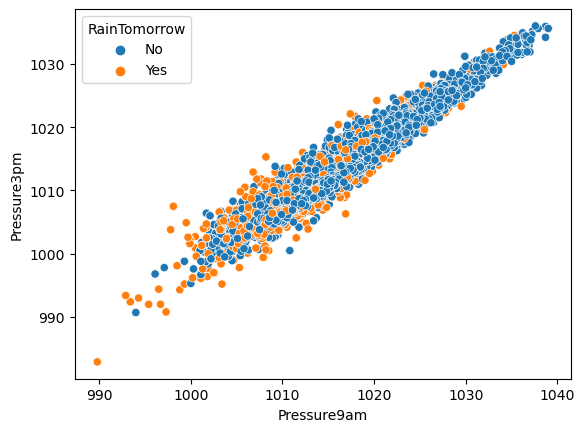

In [29]:
# Plotting scatterplot between pressure and RainTommorow
sns.scatterplot(data=df,x='Pressure9am',y='Pressure3pm',hue='RainTomorrow')

As we can see that the for lower pressure ranges we have higher possibility of raining tomorrow

<AxesSubplot:xlabel='Cloud9am', ylabel='Cloud3pm'>

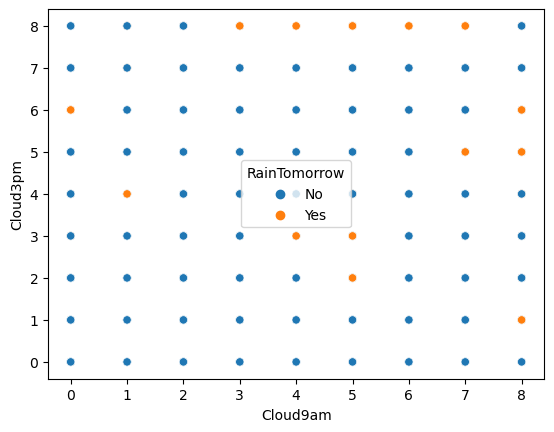

In [31]:
# Plotting scatterplot between cloud condition and RainTommorow
sns.scatterplot(data=df,x='Cloud9am',y='Cloud3pm',hue='RainTomorrow')

It is very simple to guess when it is cloudy it is raining

<AxesSubplot:xlabel='Cloud9am', ylabel='Cloud3pm'>

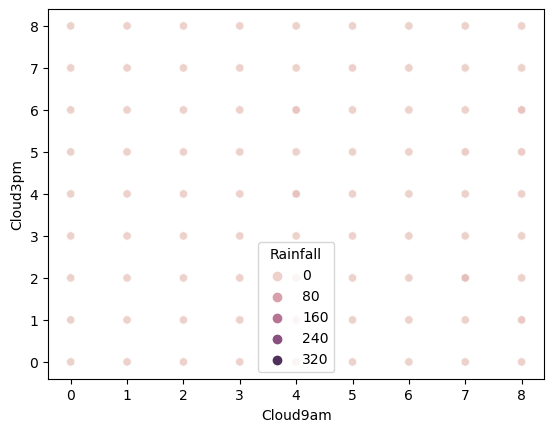

In [32]:
# Plotting scatterplot between cloud condition and Rainfall
sns.scatterplot(data=df,x='Cloud9am',y='Cloud3pm',hue='Rainfall')

It is very simple to guess when it is cloudy it is raining with high amount of rainfall

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

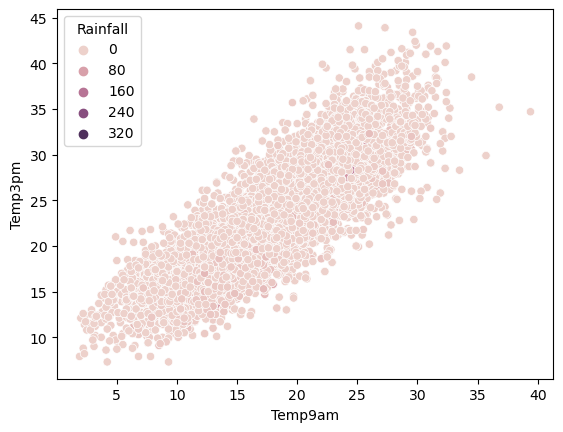

In [33]:
# Plotting scatterplot between temperature and Rainfall
sns.scatterplot(data=df,x='Temp9am',y='Temp3pm',hue='Rainfall')

Amount of rainfall is depending on lower temperature

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

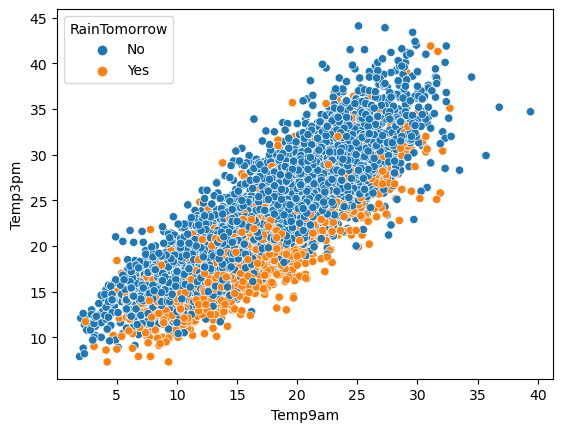

In [34]:
# Plotting scatterplot between temperature and RainTomorrow
sns.scatterplot(data=df,x='Temp9am',y='Temp3pm',hue='RainTomorrow')

when temp is on lower range it is raining

Histogram for  Date


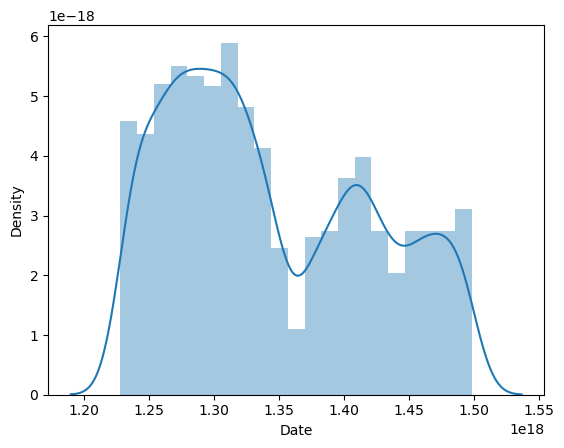

Histogram for  MinTemp


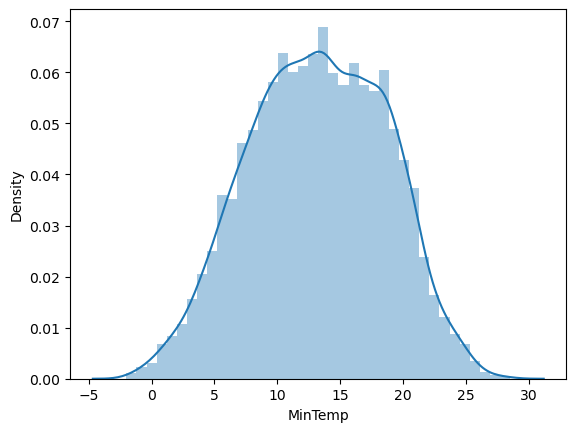

Histogram for  MaxTemp


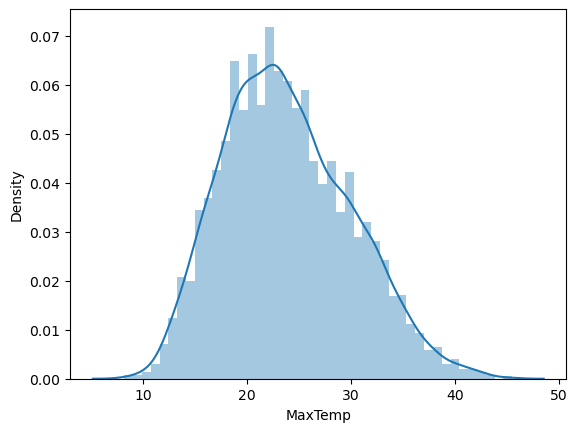

Histogram for  Rainfall


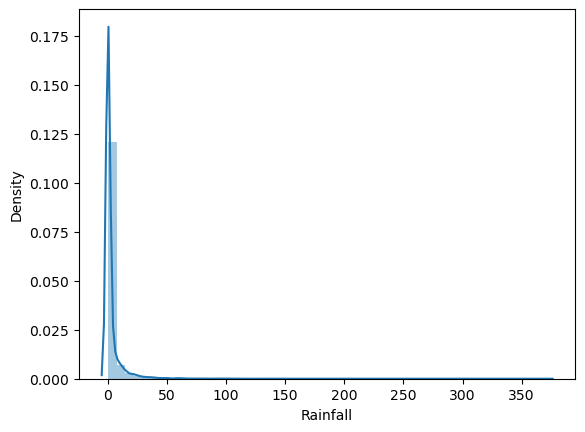

Histogram for  Evaporation


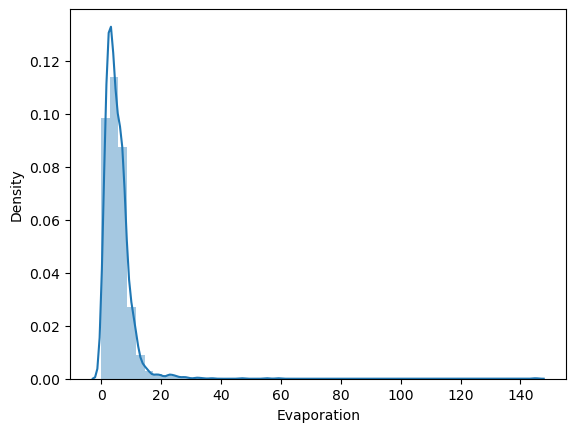

Histogram for  Sunshine


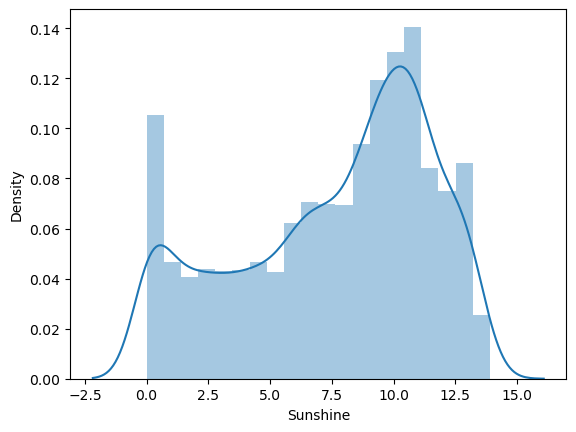

Histogram for  WindGustSpeed


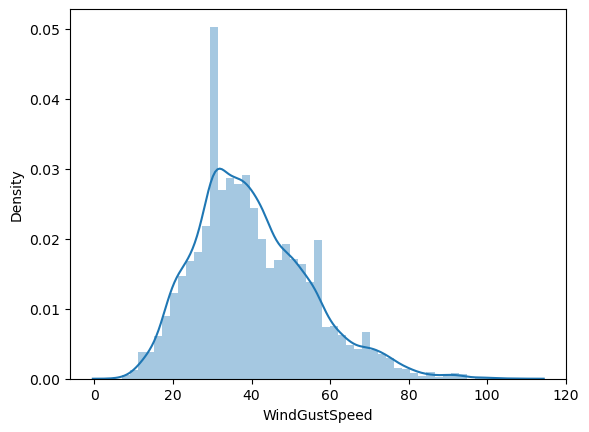

Histogram for  WindSpeed9am


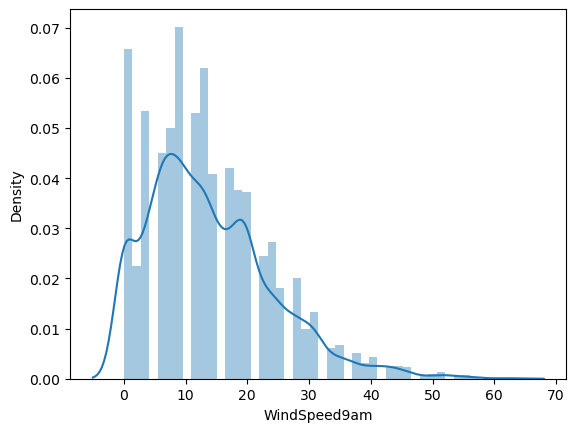

Histogram for  WindSpeed3pm


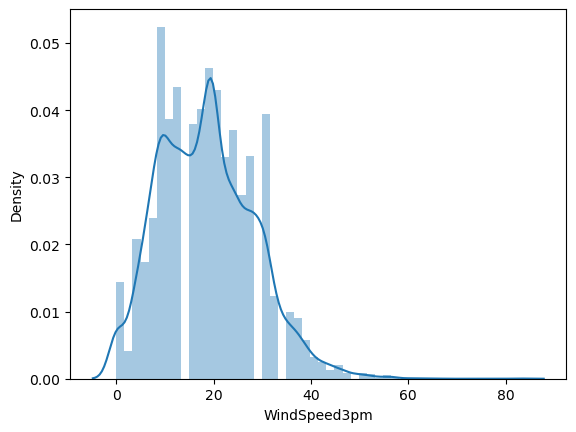

Histogram for  Humidity9am


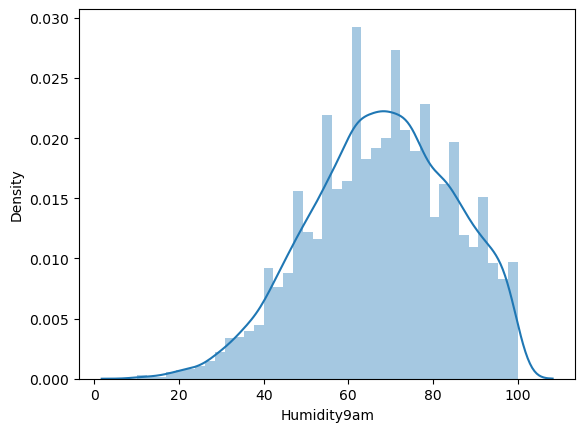

Histogram for  Humidity3pm


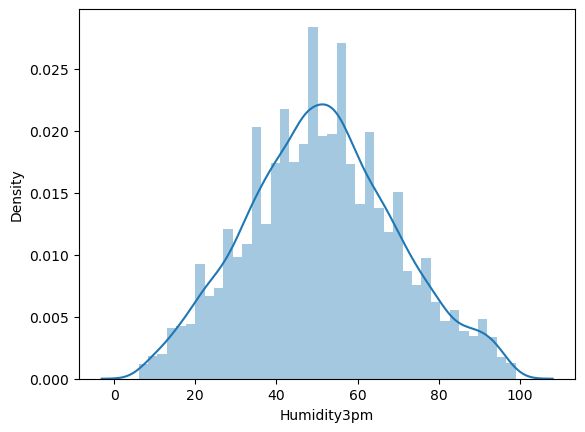

Histogram for  Pressure9am


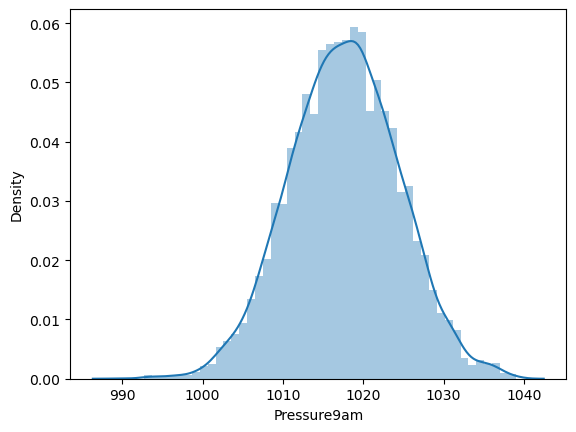

Histogram for  Pressure3pm


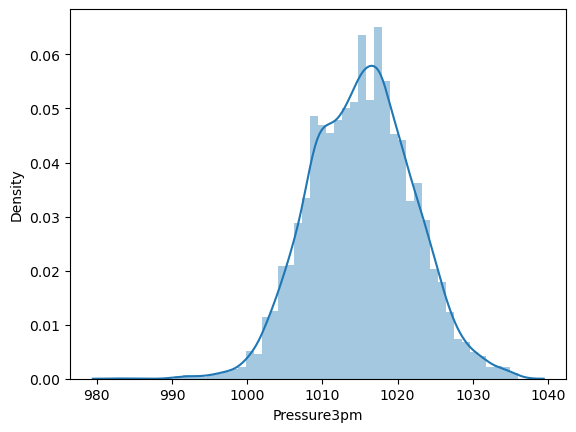

Histogram for  Cloud9am


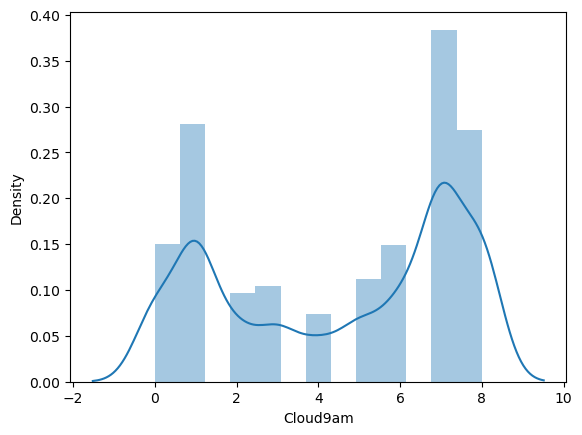

Histogram for  Cloud3pm


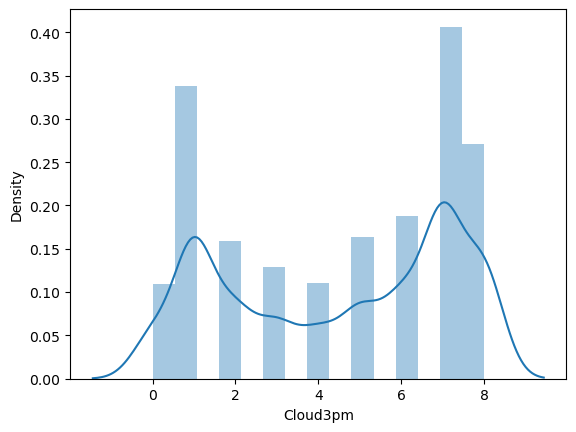

Histogram for  Temp9am


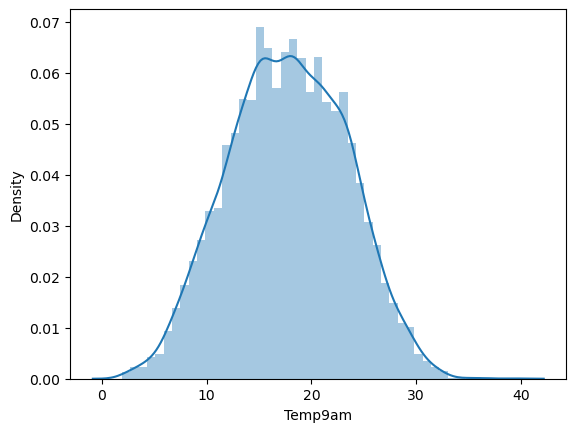

Histogram for  Temp3pm


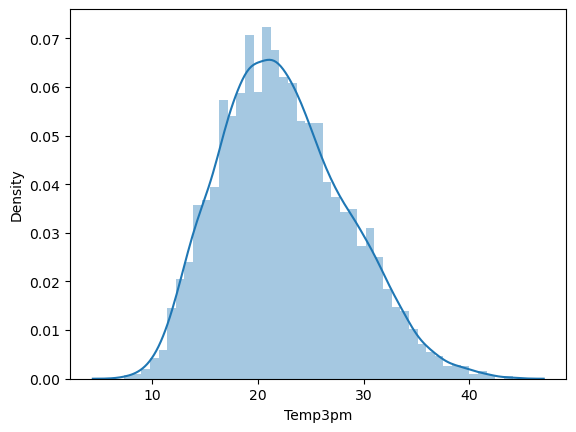

Histogram for  Year


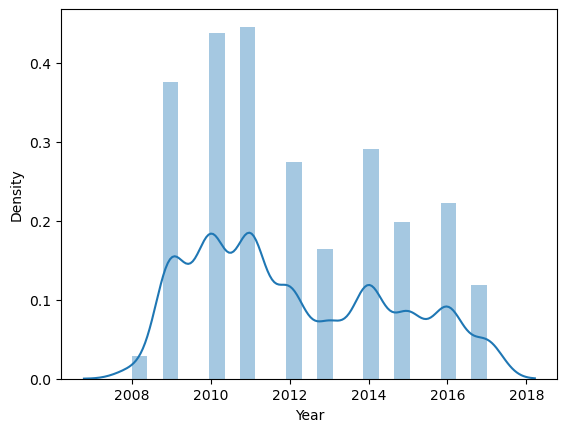

Histogram for  Month


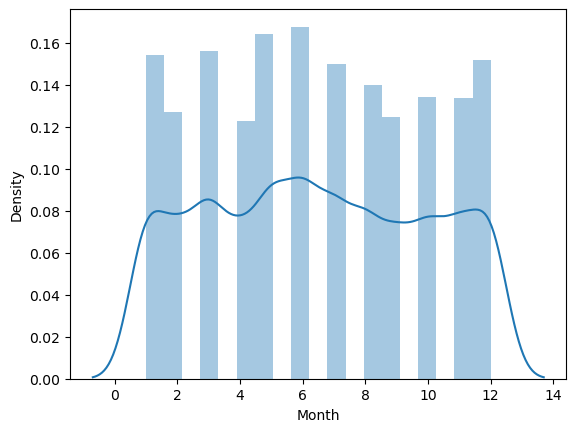

Histogram for  Day


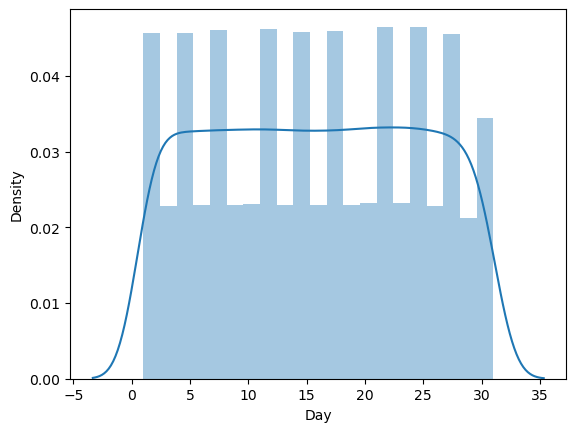

In [35]:
# Generating the paiplot 
for i in df.columns:
    if df[i].dtypes!='object':
        print("Histogram for ", i )
        sns.distplot(df[i])
        plt.show()

1. Rainfall is highly positively skewed as the mean is very high as compared to median
2. Evaporation is also right skewed, as mean is greater than median
3. windspeed9am and windgustspeed are positively skewed, but to be treated for removal of skewness
4. Sunshine is negatively skewed but is in acceptable range
5. other columns are near normal or in acceptable range

MinTemp             AxesSubplot(0.125,0.712609;0.133621x0.167391)
MaxTemp          AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Rainfall          AxesSubplot(0.44569,0.712609;0.133621x0.167391)
Evaporation      AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Sunshine         AxesSubplot(0.766379,0.712609;0.133621x0.167391)
WindGustSpeed       AxesSubplot(0.125,0.511739;0.133621x0.167391)
WindSpeed9am     AxesSubplot(0.285345,0.511739;0.133621x0.167391)
WindSpeed3pm      AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Humidity9am      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Humidity3pm      AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Pressure9am          AxesSubplot(0.125,0.31087;0.133621x0.167391)
Pressure3pm       AxesSubplot(0.285345,0.31087;0.133621x0.167391)
Cloud9am           AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Cloud3pm          AxesSubplot(0.606034,0.31087;0.133621x0.167391)
Temp9am           AxesSubplot(0.766379,0.31087;0.133621x0.167391)
Temp3pm   

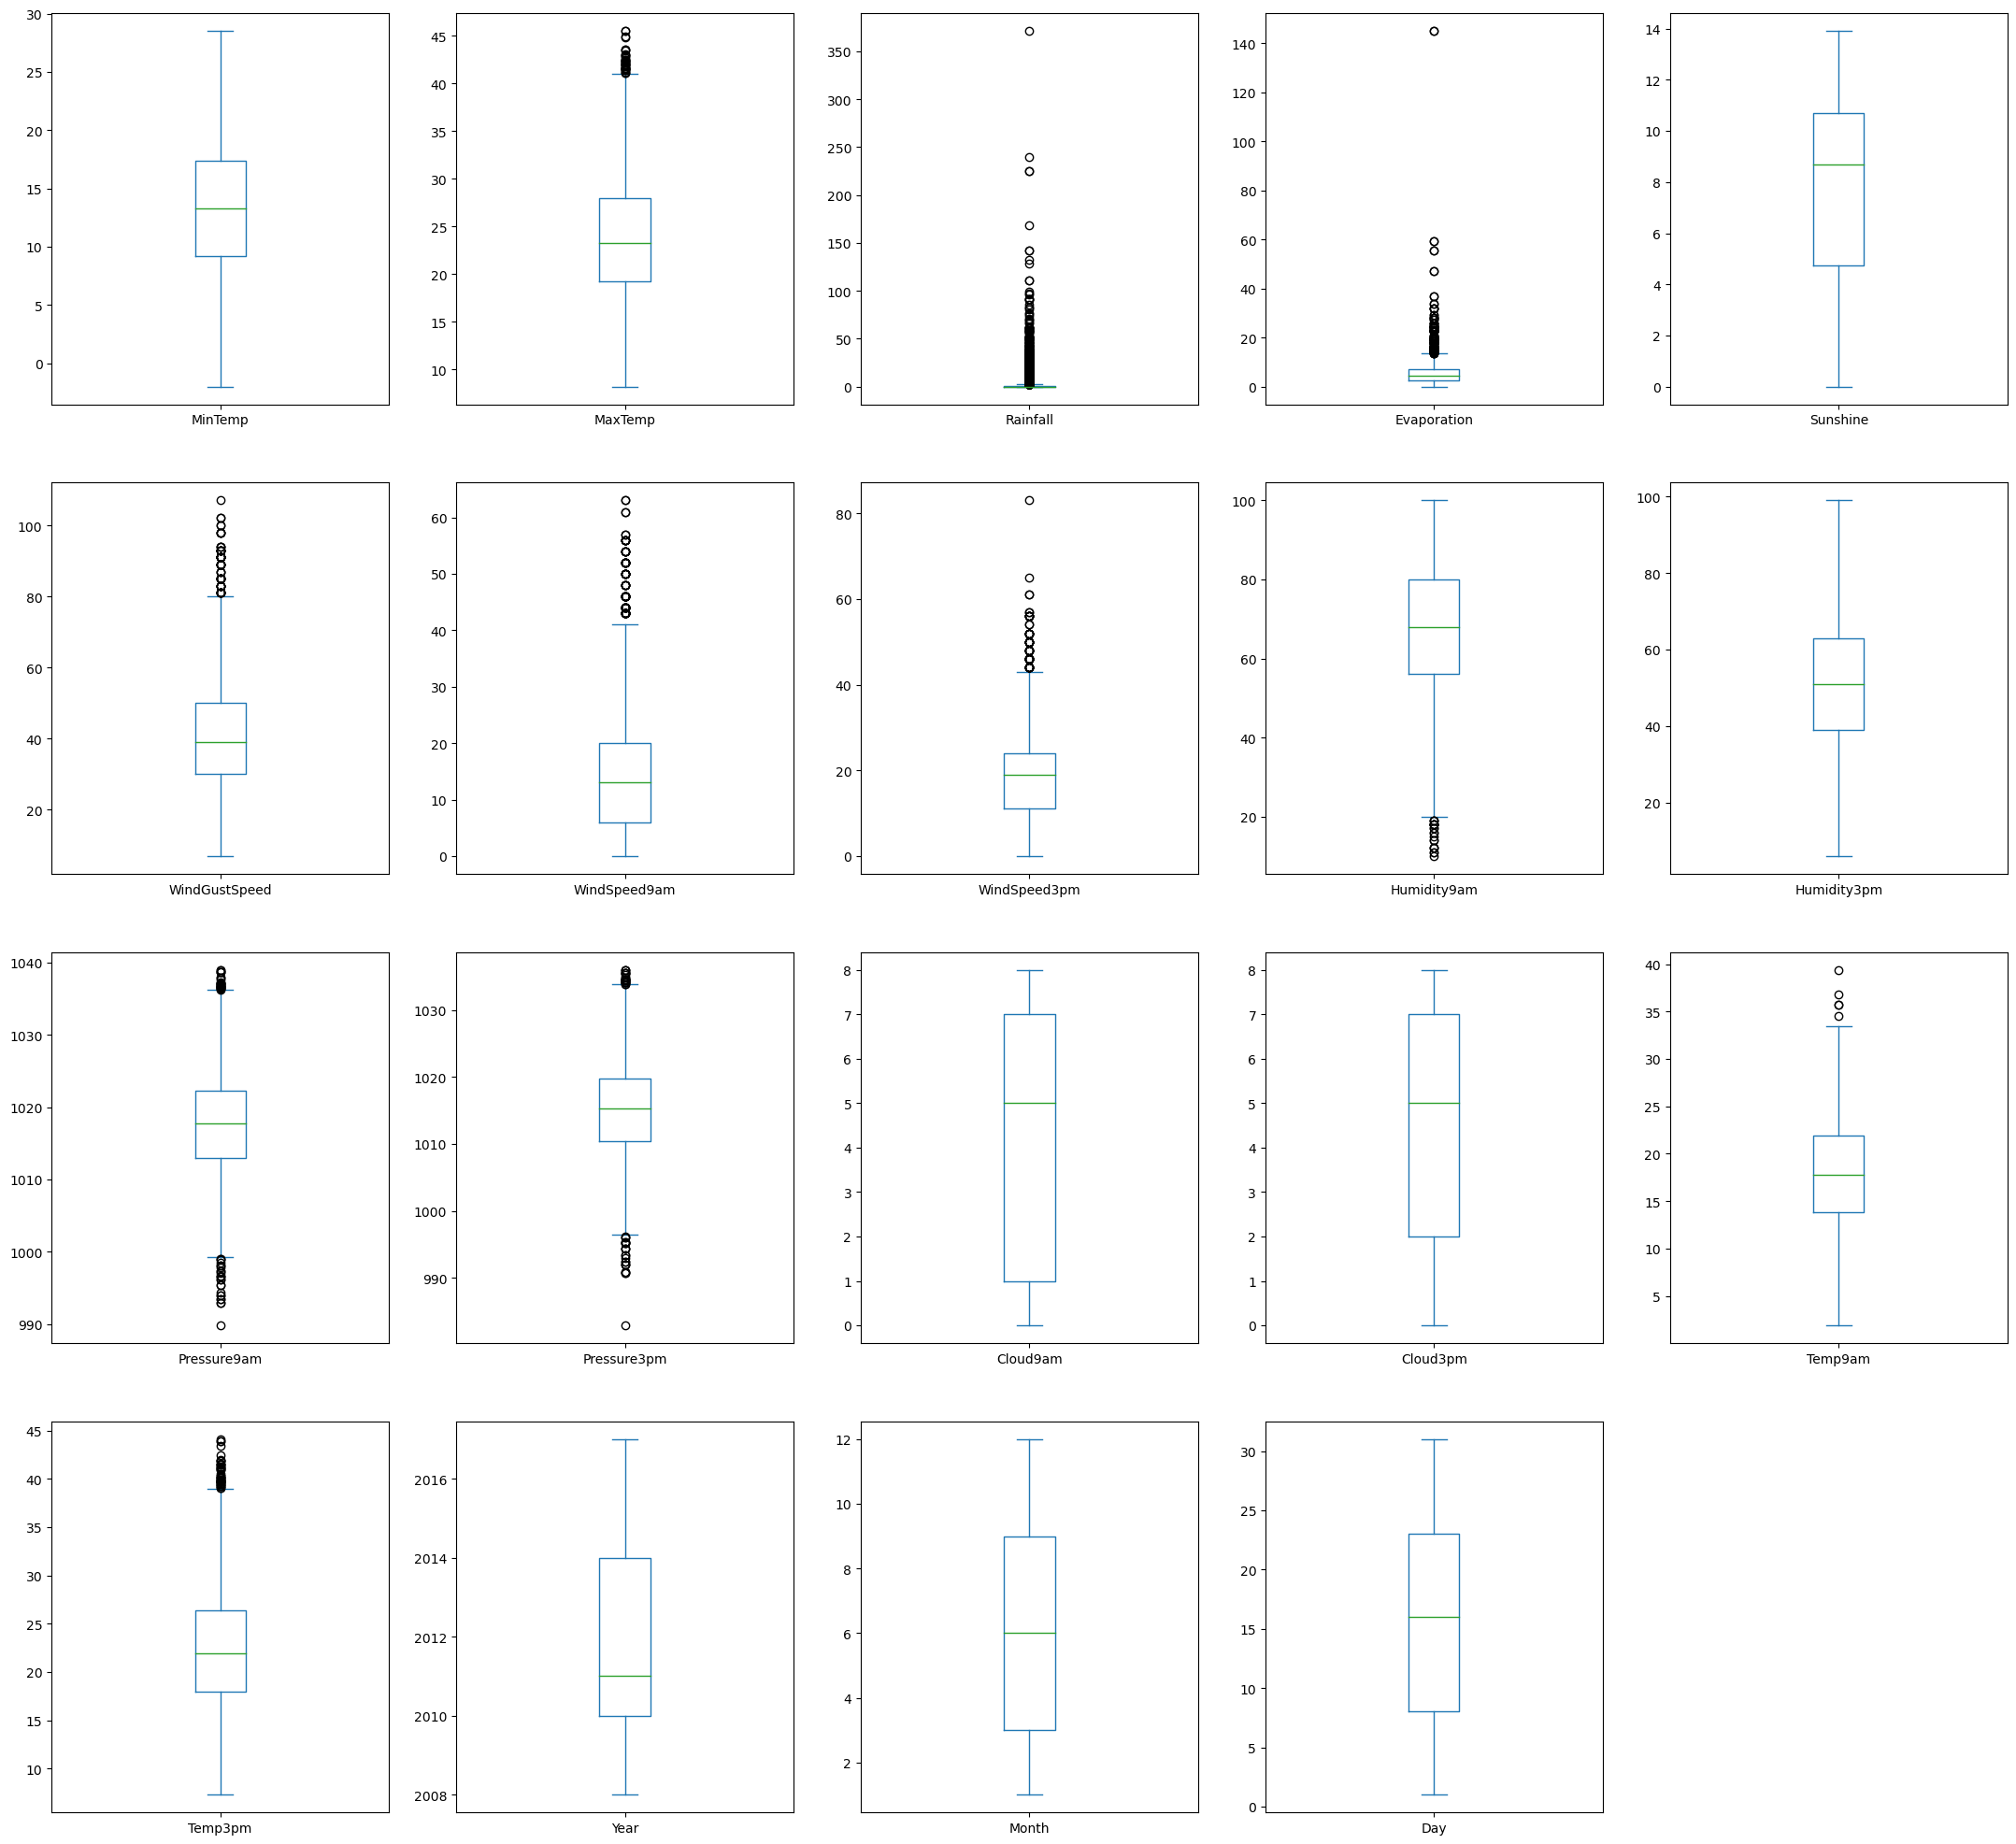

In [36]:
# Ploting thebox plot for the dataset
df.plot(kind="box", subplots=True, layout=(4,5), figsize=(27,25),sharex=False, sharey=False)

As we can see that there are multiple columns having the the outliers present in the data have to be handled in the preprocessing steps

In [37]:
# Finding correlation between variables
corr_mat=df.corr()
corr_mat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652,0.044324,-0.247142,0.009494
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665,0.120234,-0.163891,0.015668
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263,0.006530,-0.012522,-0.013953
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156,0.256852,0.005729,0.017785
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057,0.144615,-0.009156,0.006420
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872,-0.045032,0.055158,-0.003062
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619,-0.089133,0.038668,-0.003081
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201,-0.051882,0.049760,-0.009017
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788,0.100085,-0.116017,0.003814
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634,-0.029118,-0.074601,0.012590


<AxesSubplot:>

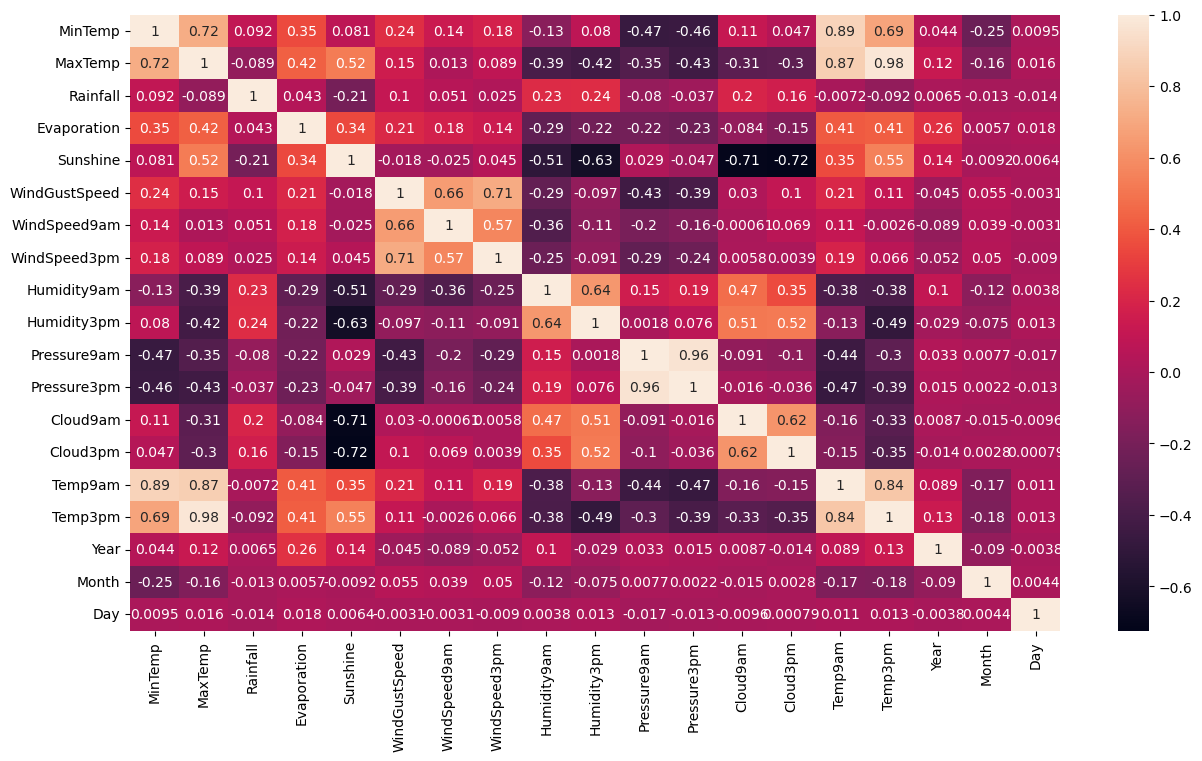

In [38]:
# Heat map for correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat,annot=True)

1. MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.72).
2. MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.69).
3. MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).
4. MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.87).
5. MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).
6. WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.66).
7. Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).
8. Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.84)

As we can see that there is very high multicollinearity present in the data so removing these from the dataset Temp9am', 'Temp3pm', 'Pressure3pm' as this would be irrelevant

In [39]:
# Dropping the Columns having Highest Nulvalues as discussed and dropping date and location
df=df.drop(['Date','Temp9am', 'Temp3pm', 'Pressure3pm'],axis=1)

In [40]:
# Filling nul values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].median())

In [41]:
# Crosschecking whether null values are filled or not
df.isnull().sum().sum()

0

## Encoding

In [42]:
# Encoding the dataset for categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,71.0,22.0,1007.7,8.0,5.0,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,15,...,44.0,25.0,1010.6,5.0,5.0,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,15,...,38.0,30.0,1007.6,5.0,2.0,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,0,...,45.0,16.0,1017.6,5.0,5.0,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,7,...,82.0,33.0,1010.8,7.0,8.0,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,4.6,8.7,0,31.0,9,1,...,51.0,24.0,1024.6,5.0,5.0,0,0,2017,6,21
8421,9,3.6,25.3,0.0,4.6,8.7,6,22.0,9,3,...,56.0,21.0,1023.5,5.0,5.0,0,0,2017,6,22
8422,9,5.4,26.9,0.0,4.6,8.7,3,37.0,9,14,...,53.0,24.0,1021.0,5.0,5.0,0,0,2017,6,23
8423,9,7.8,27.0,0.0,4.6,8.7,9,28.0,10,3,...,51.0,24.0,1019.4,3.0,2.0,0,0,2017,6,24


In [43]:
# encoding the year column
df['Year']=le.fit_transform(df['Year'])

## Removing outliers

In [44]:
# Importing Zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(8425, 22)

In [45]:
# Setting threshold at 3 and detecting the outliers
threshold=3
print(np.where(z>3))

(array([  12,   44,   52,   52,   60,   61,   62,   62,   67,   68,  123,
        267,  296,  381,  381,  405,  406,  407,  431,  462,  563,  568,
        569,  683,  699,  713,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
       2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
       2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
       2961, 2967, 2975, 2989, 3003, 3051, 3059, 3060, 3066, 3067, 3067,
       3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101,
       3141, 3150, 3153, 3157, 3164, 3172, 3172, 3

In [46]:
# Removing the outlier 
df1=df[(z<3).all(axis=1)]
df1.shape

(8009, 22)

In [47]:
# Data Loss
loss=(8425-8009)/8009*100
loss

5.194156573854414

We can see that only 5.19% data loss is there we can proceed further by removing the outliers from the dataset

In [49]:
#assigning the dataset
df=df1#assigning the dataset
df=df1

## Regression Model for predicting rainfall in mm

In [50]:
# Copying database for the regression model 
dfr=df.copy()
dfr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,71.0,22.0,1007.7,8.0,5.0,0,0,0,12,1
1,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,15,...,44.0,25.0,1010.6,5.0,5.0,0,0,0,12,2
2,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,15,...,38.0,30.0,1007.6,5.0,2.0,0,0,0,12,3
3,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,0,...,45.0,16.0,1017.6,5.0,5.0,0,0,0,12,4
4,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,7,...,82.0,33.0,1010.8,7.0,8.0,0,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,4.6,8.7,0,31.0,9,1,...,51.0,24.0,1024.6,5.0,5.0,0,0,9,6,21
8421,9,3.6,25.3,0.0,4.6,8.7,6,22.0,9,3,...,56.0,21.0,1023.5,5.0,5.0,0,0,9,6,22
8422,9,5.4,26.9,0.0,4.6,8.7,3,37.0,9,14,...,53.0,24.0,1021.0,5.0,5.0,0,0,9,6,23
8423,9,7.8,27.0,0.0,4.6,8.7,9,28.0,10,3,...,51.0,24.0,1019.4,3.0,2.0,0,0,9,6,24


In [51]:
# Checking the skewness
dfr.skew()

Location        -0.042269
MinTemp         -0.080542
MaxTemp          0.328885
Rainfall         3.524715
Evaporation      1.286271
Sunshine        -1.212459
WindGustDir      0.111576
WindGustSpeed    0.542684
WindDir9am       0.162915
WindDir3pm      -0.127700
WindSpeed9am     0.712131
WindSpeed3pm     0.299740
Humidity9am     -0.230962
Humidity3pm      0.122029
Pressure9am      0.026995
Cloud9am        -0.504789
Cloud3pm        -0.445595
RainToday        1.303717
RainTomorrow     1.295247
Year             0.429323
Month            0.053975
Day              0.001580
dtype: float64

As we can see that only one columns is there to remove skewness is WindSpeed9am, but it  cant be removed as this is a target variable and raintoday and rain tomorrow are categorical variable and not be treated for skewness

Splitting the data in Inputs and target variable

In [52]:
#Splitting the datbase into inputs and output
x=dfr.drop(['Rainfall'],axis=1)
y=dfr['Rainfall']
print(x.shape)
print(y.shape)

(8009, 21)
(8009,)


In [53]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[-1.50889904,  0.05584869, -0.14584649, ..., -1.66161235,
         1.63483858, -1.67315903],
       [-1.50889904, -1.0570029 ,  0.21914882, ..., -1.66161235,
         1.63483858, -1.55945526],
       [-1.50889904, -0.03688894,  0.31869299, ..., -1.66161235,
         1.63483858, -1.44575149],
       ...,
       [ 1.02785358, -1.42795343,  0.51778134, ...,  2.00098756,
        -0.12321838,  0.82832396],
       [ 1.02785358, -0.98281279,  0.53437204, ...,  2.00098756,
        -0.12321838,  0.94202773],
       [ 1.02785358,  0.33406159, -0.07948371, ...,  2.00098756,
        -0.12321838,  1.05573151]])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [56]:
#Finding best random state for building Models
maxAccu=0
maxRS=0

for i in range(0, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5279235000669629 on Random State 49


I am selecting the maximum r2score 53% at random state 49

In [57]:
# Spliting data on the best Random state we have got
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=181)

In [58]:
#running that same model again for other metrics too

lr.fit(x_train,y_train)
predtrainlr=lr.predict(x_train)
predtestlr=lr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainlr))
print('testing accuracy is ', r2_score(y_test,predtestlr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestlr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestlr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestlr)))

training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
Mean Squared Error is  9.271245211909632
Mean Absolute Error is  1.4525298006334606
Root Mean Squared Error is  3.044871953286317


In [59]:
#Cross validation of the lr model
for j in range(2,20):
    cv_score=cross_val_score(lr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())
    print('training accuracy is ', r2_score(y_train,predtrainlr))
    print('testing accuracy is ', r2_score(y_test,predtestlr))

At fold  2 Mean CV score is  0.48732156011983774
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  3 Mean CV score is  0.4864743258717577
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  4 Mean CV score is  0.4813417178336086
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  5 Mean CV score is  0.491039024293291
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  6 Mean CV score is  0.48723142739648484
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  7 Mean CV score is  0.48744517767845935
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  8 Mean CV score is  0.4888936248350442
training accuracy is  0.49036352171705466
testing accuracy is  0.5281014201655903
At fold  9 Mean CV score is  0.4884761423030953
training accuracy is  0.4903635217170546

## DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtraindtr=dtr.predict(x_train)
predtestdtr=dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraindtr))
print('testing accuracy is ', r2_score(y_test,predtestdtr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestdtr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestdtr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestdtr)))

In [60]:
#Cross validation of the dtr model
dtr=DecisionTreeRegressor()
for j in range(2,10):
    cvdtr=cross_val_score(dtr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cvdtr.mean())

At fold  2 Mean CV score is  0.07079506220474563
At fold  3 Mean CV score is  0.22089077490852235
At fold  4 Mean CV score is  0.06876640517101523
At fold  5 Mean CV score is  0.24719943651762044
At fold  6 Mean CV score is  0.2946482856909964
At fold  7 Mean CV score is  0.27812425472905405
At fold  8 Mean CV score is  0.3007520511729243
At fold  9 Mean CV score is  0.35084432587811354


## Random Forest Regressor

In [61]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predtrainrfr=rfr.predict(x_train)
predtestrfr=rfr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrfr))
print('testing accuracy is ', r2_score(y_test,predtestrfr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrfr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrfr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrfr)))

training accuracy is  0.9482849819622923
testing accuracy is  0.6820544914398232
Mean Squared Error is  6.246576912609238
Mean Absolute Error is  0.9497652933832709
Root Mean Squared Error is  2.49931528875595


In [62]:
#Cross validation of the rfr model
for j in range(2,10):
    cv_score=cross_val_score(rfr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.5211216377592889
At fold  3 Mean CV score is  0.5257359082135696
At fold  4 Mean CV score is  0.49679749845513377
At fold  5 Mean CV score is  0.5769169859355552
At fold  6 Mean CV score is  0.5803327153873548
At fold  7 Mean CV score is  0.6030860844521051
At fold  8 Mean CV score is  0.6124696209925817
At fold  9 Mean CV score is  0.6470265024451418


## ExtraTrees Regressor

In [63]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predtrainetr=etr.predict(x_train)
predtestetr=etr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainetr))
print('testing accuracy is ', r2_score(y_test,predtestetr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestetr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestetr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestetr)))

training accuracy is  1.0
testing accuracy is  0.6909803183217228
Mean Squared Error is  6.071213956928839
Mean Absolute Error is  0.814897003745319
Root Mean Squared Error is  2.463983351593277


In [64]:
#Cross validation of the etr model
for j in range(2,10):
    cv_score=cross_val_score(etr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.5345632703980165
At fold  3 Mean CV score is  0.545757952451419
At fold  4 Mean CV score is  0.5153820053920493
At fold  5 Mean CV score is  0.6015516593227563
At fold  6 Mean CV score is  0.6003503439513184
At fold  7 Mean CV score is  0.6245195976644881
At fold  8 Mean CV score is  0.6417990367026051
At fold  9 Mean CV score is  0.6746168544907449


##  GradientBoostingRegressor

In [65]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predtraingbr=gbr.predict(x_train)
predtestgbr=gbr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraingbr))
print('testing accuracy is ', r2_score(y_test,predtestgbr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestgbr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestgbr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestgbr)))

training accuracy is  0.6430230804513597
testing accuracy is  0.5856754065201103
Mean Squared Error is  8.140106937437182
Mean Absolute Error is  1.1833362151292817
Root Mean Squared Error is  2.8530872642520384


In [66]:
#Cross validation of the gbr model
for j in range(2,10):
    cv_score=cross_val_score(gbr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.48707327781450627
At fold  3 Mean CV score is  0.49010886768564266
At fold  4 Mean CV score is  0.4754271863655746
At fold  5 Mean CV score is  0.519997235624939
At fold  6 Mean CV score is  0.5166520510897873
At fold  7 Mean CV score is  0.5266748696884839
At fold  8 Mean CV score is  0.5323106513601992
At fold  9 Mean CV score is  0.5402898790195729


## HyperParameter with Lasso

In [68]:
# Doing Lasso Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,40,60,80],
            'tol': [0.001,0.0001,0.00001,0.000001]}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'max_iter': 40, 'random_state': 0, 'tol': 1e-06}


In [70]:
ls=Lasso(alpha=0.01, max_iter=100, random_state=0, tol=1e-06)
ls.fit(x_train,y_train)
predtrainls=ls.predict(x_train)
predtestls=ls.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainls))
print('testing accuracy is ', r2_score(y_test,predtestls))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestls))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestls))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestls)))

training accuracy is  0.4902072704590529
testing accuracy is  0.5295401009232396
Mean Squared Error is  9.242979896742751
Mean Absolute Error is  1.433810739438945
Root Mean Squared Error is  3.040226948229811


In [71]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(ls, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.48934551873430016
At fold  3 Mean CV score is  0.48770523769649365
At fold  4 Mean CV score is  0.48324681726674945
At fold  5 Mean CV score is  0.49161860429810045
At fold  6 Mean CV score is  0.48834415950225235
At fold  7 Mean CV score is  0.4880668221034285
At fold  8 Mean CV score is  0.4891990979018409
At fold  9 Mean CV score is  0.4891025652026692


## HyperParameter with Ridge

In [74]:
# Doing Ridge Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,40,60,80],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

rg=Ridge()
clf=GridSearchCV(rg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'max_iter': 10, 'random_state': 5, 'solver': 'sag'}


In [75]:
rg=Ridge(alpha=10, max_iter=10, random_state=5, solver='sag')
rg.fit(x_train,y_train)
predtrainrg=rg.predict(x_train)
predtestrg=rg.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrg))
print('testing accuracy is ', r2_score(y_test,predtestrg))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrg))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrg))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrg)))

training accuracy is  0.48905110139359553
testing accuracy is  0.5251887731286217
Mean Squared Error is  9.328469085956792
Mean Absolute Error is  1.4823849684273105
Root Mean Squared Error is  3.0542542602011364


In [76]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(rg, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.4827282790594343
At fold  3 Mean CV score is  0.48637202019245757
At fold  4 Mean CV score is  0.4814849779377494
At fold  5 Mean CV score is  0.49126477565761223
At fold  6 Mean CV score is  0.48631534639187546
At fold  7 Mean CV score is  0.48713599091795795
At fold  8 Mean CV score is  0.4890374112858298
At fold  9 Mean CV score is  0.48826527387709956


As we can see from the outputs of the each model Extra tree regressor is giving training and testing accuracy nearby hence I am selecting extra tree regressor

## Hyper parameter Tuning

In [78]:
import warnings
warnings.filterwarnings("ignore") 

In [80]:
# modelling with ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

parameter = {
    'n_estimators': [30,60],
        'max_features': ['sqrt','log2'],
      'criterion':['mse','mae']
}

model = ExtraTreesRegressor ()

gcv = GridSearchCV(model,parameter,cv=9,n_jobs=-1).fit(x_train,y_train.values.ravel())

gcv.best_params_

/Users/tabrezkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/tabrezkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/tabrezkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/tabrezkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/tabrezkhan/opt/an

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 60}

In [81]:
# Checking score with best parameter
final_model=ExtraTreesRegressor(criterion='mse',max_features='sqrt',n_estimators=300)
final_model.fit(x_train,y_train)
predfinal=final_model.predict(x_test)
print('Final Accuracy is with Extra Tree Regressor = ',r2_score(y_test,predfinal))

Final Accuracy is with Extra Tree Regressor =  0.7152929651313644


In [84]:
#Importing Job lib for saving the model
import joblib
joblib.dump(ExtraTreesRegressor(criterion='mse',max_features='sqrt',n_estimators=300), "Rainfall Prediction in mm.pkl")

['Rainfall Prediction in mm.pkl']

In [85]:
# Conclusion
a=np.array(y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predfinal}, index=range(len(a)))
df_con

,Original,Predicted
0,0.0,0.000000
1,0.0,0.034333
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.389333
...,...,...
1597,0.0,0.038667
1598,0.0,0.000000
1599,0.0,0.000000
1600,0.0,0.053000


To predict how much rainfall could be there, I have assumed the rainfall as a target variable but the model is not doing good, although for classification it is doing very good

I am wondering that there should be one column which is predicting the 'milimeter' of rain in the database which is missing, Hence I am not able to perform the regression analysis please consider this

##  Classification model to Predict RainTomorrow

In [86]:
X=df.drop(['RainTomorrow'],axis=1)
Y=df['RainTomorrow']
print(X.shape)
print(Y.shape)

(8009, 21)
(8009,)


In [87]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
X=power_transform(X, method='yeo-johnson')
X

array([[-1.5682852 ,  0.06060344, -0.0734849 , ..., -2.40565137,
         1.52477015, -1.88640618],
       [-1.5682852 , -1.05556958,  0.28807299, ..., -2.40565137,
         1.52477015, -1.70422725],
       [-1.5682852 , -0.03191747,  0.38348436, ..., -2.40565137,
         1.52477015, -1.53796992],
       ...,
       [ 1.01495158, -1.4313174 ,  0.57052254, ...,  1.67668156,
        -0.04635331,  0.8352866 ],
       [ 1.01495158, -0.98068825,  0.58588964, ...,  1.67668156,
        -0.04635331,  0.93378743],
       [ 1.01495158,  0.33772686, -0.00630683, ...,  1.67668156,
        -0.04635331,  1.031236  ]])

In [89]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[-1.5682852 ,  0.06060344, -0.0734849 , ..., -2.40565137,
         1.52477015, -1.88640618],
       [-1.5682852 , -1.05556958,  0.28807299, ..., -2.40565137,
         1.52477015, -1.70422725],
       [-1.5682852 , -0.03191747,  0.38348436, ..., -2.40565137,
         1.52477015, -1.53796992],
       ...,
       [ 1.01495158, -1.4313174 ,  0.57052254, ...,  1.67668156,
        -0.04635331,  0.8352866 ],
       [ 1.01495158, -0.98068825,  0.58588964, ...,  1.67668156,
        -0.04635331,  0.93378743],
       [ 1.01495158,  0.33772686, -0.00630683, ...,  1.67668156,
        -0.04635331,  1.031236  ]])

In [90]:
# Checking the VIF score of the variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(X)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,0,1.484453
1,1,4.813991
2,2,5.506090
3,3,8.394698
4,4,1.641711
5,5,2.004741
6,6,1.607510
7,7,2.208596
8,8,1.316716
9,9,1.431375


As we can see that VIF scores of all input variables are less than 10 hence it is acceptable and moved further

**Balancing database**

In [93]:
Y.value_counts()

0    6181
1    1828
Name: RainTomorrow, dtype: int64

In [95]:
# Importing Libraries for it 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)
Y.value_counts()

0    6181
1    6181
Name: RainTomorrow, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()

In [100]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', maxrs)

At Random State  1
testing accuracy 0.7735543873837445 randon state 1
Training Accuracy 0.7674183436141166 random state 1
max accuracy 0.7735543873837445 max_random_state 1
At Random State  2
testing accuracy 0.7743631217145168 randon state 2
Training Accuracy 0.7654970168874508 random state 2
max accuracy 0.7743631217145168 max_random_state 2
At Random State  3
testing accuracy 0.7735543873837445 randon state 3
Training Accuracy 0.7664071190211346 random state 3
At Random State  4
testing accuracy 0.7751718560452892 randon state 4
Training Accuracy 0.7650925270502579 random state 4
max accuracy 0.7751718560452892 max_random_state 4
At Random State  5
testing accuracy 0.7666801455721796 randon state 5
Training Accuracy 0.767114976236222 random state 5
At Random State  6
testing accuracy 0.7533360291144359 randon state 6
Training Accuracy 0.7717666093639397 random state 6
At Random State  7
testing accuracy 0.7735543873837445 randon state 7
Training Accuracy 0.7665082414804328 random st

In [101]:
print('max accuracy', maxaccu , 'max_random_state', maxrs)

max accuracy 0.7828548321876264 max_random_state 29


In [102]:
# train test split for the data with suggested random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=29)

In [103]:
# Checking score again for the the lr model 
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
predtrain=lg.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predlg))
print(confusion_matrix(Y_test,predlg))
print(classification_report(Y_test,predlg))

Training accuracy is  0.7638790575386794
0.7828548321876264
[[1011  260]
 [ 277  925]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1271
           1       0.78      0.77      0.78      1202

    accuracy                           0.78      2473
   macro avg       0.78      0.78      0.78      2473
weighted avg       0.78      0.78      0.78      2473



In [104]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

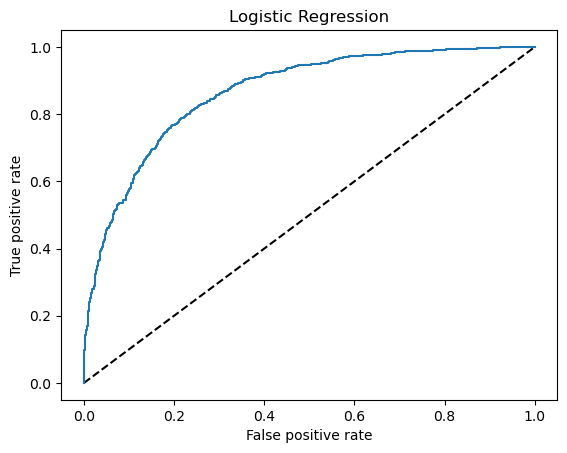

0.7824937063980698

In [105]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

In [106]:
# using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
predtrain=dtc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Training accuracy is  1.0
0.8811160533764658
[[1116  155]
 [ 139 1063]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1271
           1       0.87      0.88      0.88      1202

    accuracy                           0.88      2473
   macro avg       0.88      0.88      0.88      2473
weighted avg       0.88      0.88      0.88      2473



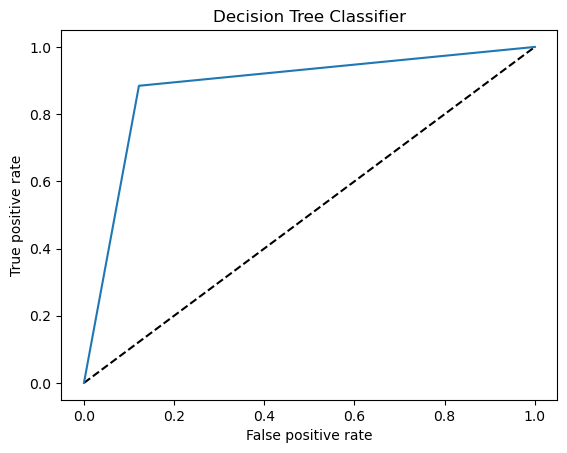

0.8812040907430705

In [107]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

In [108]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
predtrain=rf.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Training accuracy is  1.0
0.938536190861302
[[1191   80]
 [  72 1130]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1271
           1       0.93      0.94      0.94      1202

    accuracy                           0.94      2473
   macro avg       0.94      0.94      0.94      2473
weighted avg       0.94      0.94      0.94      2473



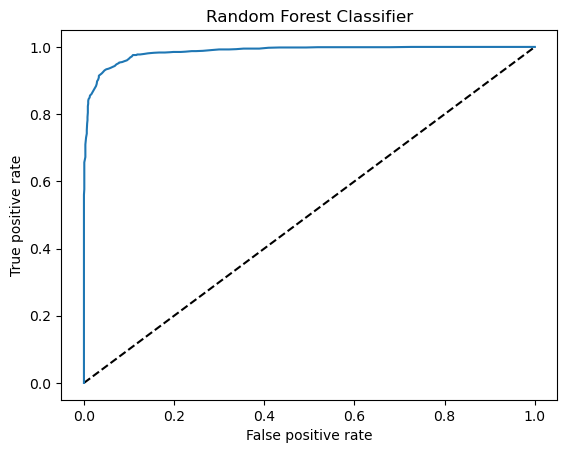

0.9385786343505643

In [109]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

In [110]:
# Using SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
predtrain=svc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Training accuracy is  0.888866417231267
0.8645369995956328
[[1069  202]
 [ 133 1069]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1271
           1       0.84      0.89      0.86      1202

    accuracy                           0.86      2473
   macro avg       0.87      0.87      0.86      2473
weighted avg       0.87      0.86      0.86      2473



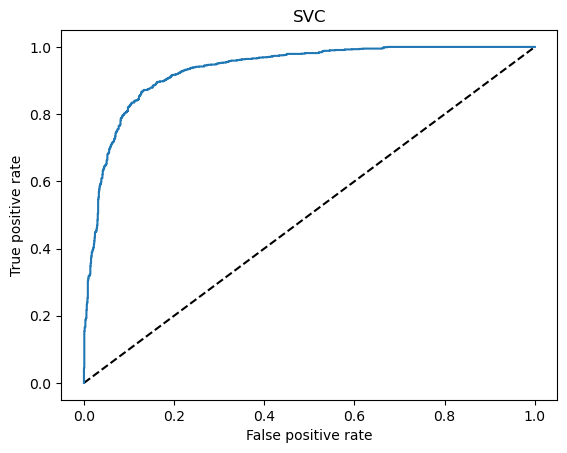

0.865210552567122

In [112]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

In [113]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

Training accuracy is  0.9091920315502073
0.8633238980994743
[[ 976  295]
 [  43 1159]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1271
           1       0.80      0.96      0.87      1202

    accuracy                           0.86      2473
   macro avg       0.88      0.87      0.86      2473
weighted avg       0.88      0.86      0.86      2473



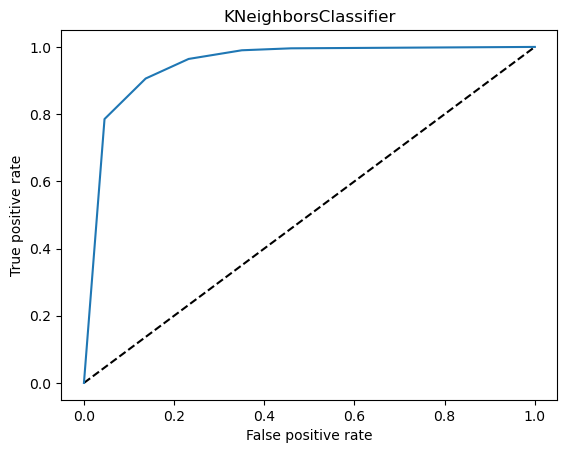

0.8660627907068079

In [114]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

In [115]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
predxgb=xgb.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predxgb))
print(confusion_matrix(Y_test,predxgb))
print(classification_report(Y_test,predxgb))

Training accuracy is  0.9091920315502073
0.8604933279417711
[[1105  166]
 [ 179 1023]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1271
           1       0.86      0.85      0.86      1202

    accuracy                           0.86      2473
   macro avg       0.86      0.86      0.86      2473
weighted avg       0.86      0.86      0.86      2473



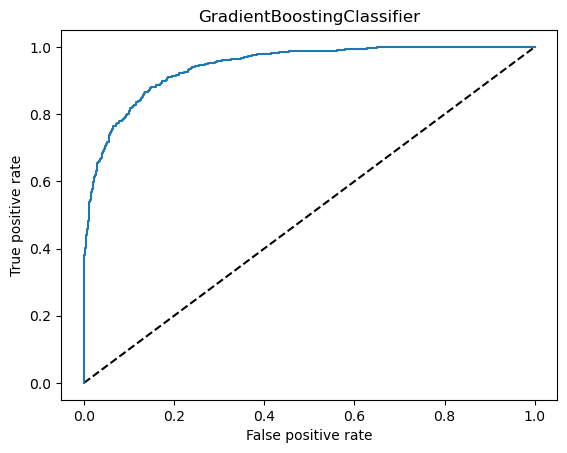

0.860237854297388

In [117]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,xgb.predict(X_test))

auc_score

In [118]:
# using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
predtrain=ada.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predada))
print(confusion_matrix(Y_test,predada))
print(classification_report(Y_test,predada))

Training accuracy is  0.8150470219435737
0.8208653457339264
[[1047  224]
 [ 219  983]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1271
           1       0.81      0.82      0.82      1202

    accuracy                           0.82      2473
   macro avg       0.82      0.82      0.82      2473
weighted avg       0.82      0.82      0.82      2473



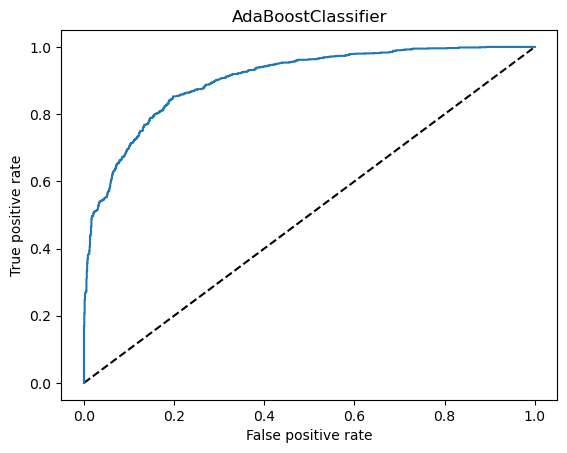

0.8207822394095338

In [119]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

In [120]:
# Using Naive bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
predtrain=gnb.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

Training accuracy is  0.7361715036909697
0.748887990295188
[[963 308]
 [313 889]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1271
           1       0.74      0.74      0.74      1202

    accuracy                           0.75      2473
   macro avg       0.75      0.75      0.75      2473
weighted avg       0.75      0.75      0.75      2473



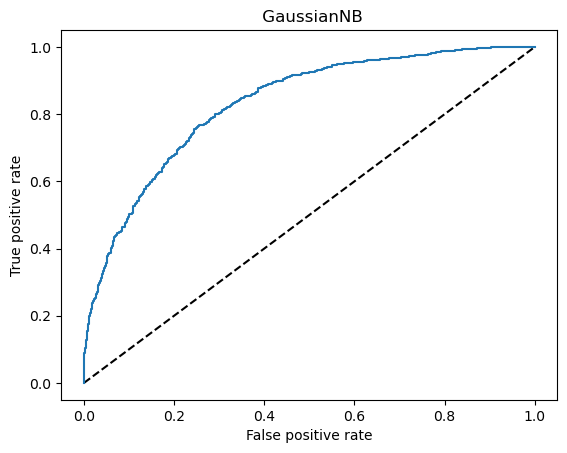

0.748635895327876

In [121]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

In [123]:
# validation accuracy
from sklearn.model_selection import cross_val_score
model=[lg,dtc,rf,knn,xgb,ada,gnb]

for i in model:
    for j in range(11,21):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())


taking cv = 11
Cross validation score for  LogisticRegression()  is [0.80516014 0.65391459 0.57740214 0.7980427  0.66281139 0.7019573
 0.69395018 0.69839858 0.79092527 0.83526269 0.82101514]
Mean of Cross Val. score is  0.7308036458935013
taking cv = 12
Cross validation score for  LogisticRegression()  is [0.81183317 0.64112512 0.63980583 0.75048544 0.64563107 0.68349515
 0.71165049 0.70679612 0.73106796 0.8038835  0.82815534 0.82330097]
Mean of Cross Val. score is  0.7314358447983075
taking cv = 13
Cross validation score for  LogisticRegression()  is [0.81598318 0.65930599 0.67718191 0.71398528 0.74237645 0.67192429
 0.69400631 0.68033649 0.70977918 0.75184017 0.82018927 0.82334385
 0.82947368]
Mean of Cross Val. score is  0.7376712346262404
taking cv = 14
Cross validation score for  LogisticRegression()  is [0.83012458 0.69309173 0.70441676 0.60928652 0.80860702 0.65685164
 0.66817667 0.72253681 0.71234428 0.68403171 0.76670442 0.83238958
 0.82785957 0.82332956]
Mean of Cross Val. sc

Observation and Model selection on the basis of above results
We can see that the Random Forest Classifier is giving accuracy of almost 94%, higher than the rest of the Classifiers.
If consider the cross val score of all the classifiers at fold 20 the Random Forest Classifier is giving the score of 91.60%
Hence I am selecting the Random Forest Classifier for the given prediction

## Hyperparameter Tunning

In [124]:
#Creating parameter list to be passed in GridSearchCV
parameters = {
    'n_estimators':[50,80],
    'max_features':['auto','log2'],
    'max_depth':[40,50]
 
}     

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=20,
                scoring='accuracy')

In [125]:
GCV.fit(X_train,Y_train)  

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 80]},
             scoring='accuracy')

In [126]:
GCV.best_params_

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 80}

In [127]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_depth=40,max_features='auto',n_estimators=80)
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.9373230893651435


<function matplotlib.pyplot.show(close=None, block=None)>

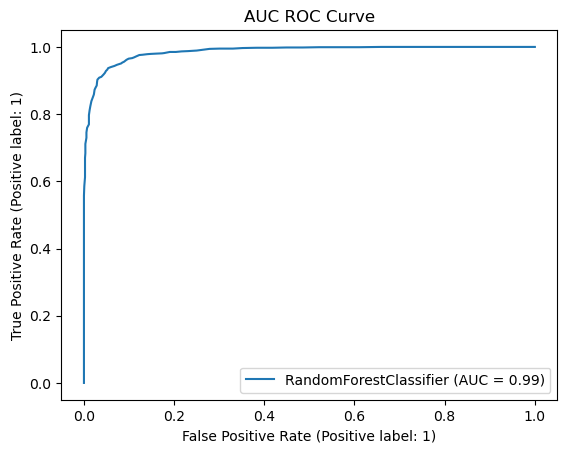

In [128]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

In [129]:
# Saving the Model
import joblib
joblib.dump(GCV.best_estimator_, "Weather Forecasting Rain Prediction.pkl")

['Weather Forecasting Rain Prediction.pkl']

In [130]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
2468,1,1
2469,0,0
2470,0,0
2471,1,1
